# Baseline Diagrams/Algebra

# Optimality

We start out with the case in which labor is allocated optimally, so the marginal product on the commons is equal to that in the enclosed sector, given the degree of enclosure:

$$
\alpha\left(\frac{1-t_e}{1-l_e}\right)^{1-\alpha}=\alpha\theta\left(\frac{t_e}{l_e}\right)^{1-\alpha}
$$

So, what I call $l_e^1$ in the paper is:

$$
l_e^1 = \frac{\theta^\frac{1}{1-\alpha}t_e}{1-t_e+\theta^\frac{1}{1-\alpha}t_e}
$$

The Aggregate production function is:

$$
Y= \bar T^{1-\alpha} \bar L^\alpha\left(\theta t_e^{1-\alpha} l_e^\alpha+(1-t_e)^{1-\alpha}(1-l_e)^\alpha\right) - c \bar T t_e
$$

Which reduces to

$$
\bar T^{1-\alpha} \bar L^\alpha \left(1-t_e+\theta^\frac{1}{1-\alpha}t_e\right)^{1-\alpha}-c\bar T t_e
$$

# First best, unconditional optimality

Now, from the above, it is clear that $\theta<1$ is a non-starter. In this case, the above function is just decreasing in $t_e$. But it is also true that if $\theta>0$, then the function is everywhere concave. 

This is important because it shows that the cases in which the function is convex derive from misallocation on the commons. In any event, we can evaluate the derivatives of this function at zero and one to see if enclosure should be void, partial, or full. Let's write in intensive form as:

$$
\bar T\left[A \bar l^\alpha \left(1-t_e+\theta^\frac{1}{1-\alpha}t_e\right)^{1-\alpha}-c t_e\right]
$$

Here is a coded version in ```sympy```.

In [15]:
import logging
import warnings

logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)
warnings.filterwarnings('ignore', category=UserWarning)

import numpy as np
import matplotlib.pyplot as plt

from sympy import *
init_printing()

In [16]:
l, theta, te, alpha, c, A = symbols('l theta t_e alpha c A')
Yfb = A*l**alpha*((theta**(1/(1-alpha))-1 )*te + 1)**(1-alpha) - c*te
Yfb

The derivative is:

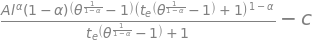

In [17]:
Yfbp = diff(Yfb, te)
Yfbp

So, what we will do to get the loci for the first-best case is 

- substitute in 0 and 1
- solve the result for $p$. 

We have:

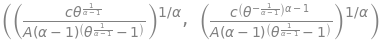

In [18]:
Yfbl0 = Yfbp.subs({te:0})
Yfbl1 = Yfbp.subs({te:1})
solve(Yfbl0, l)[0].simplify(), solve(Yfbl1, l)[0].simplify()

Rewrite the above as:

$$
l_0^1 = \left[\frac{1}{A}\frac{c}{(\theta^\frac{1}{1-\alpha}-1)(1-\alpha)}\right]^\frac{1}{\alpha}
$$

$$
l_1^1 = \left[\frac{1}{A}\frac{c\theta^\frac{\alpha}{1-\alpha}}{(\theta^\frac{1}{1-\alpha}-1)(1-\alpha)}\right]^\frac{1}{\alpha}
$$

# The shape of aggregate production with conditional optimality

Repeat the same steps but using the labor allocation condition: 

$$
\left(\frac{1-t_e}{1-l_e}\right)^{1-\alpha}=\alpha\theta\left(\frac{t_e}{l_e}\right)^{1-\alpha}
$$

Out of this, we have:

$$
l_e^* = \frac{(\alpha\theta)^\frac{1}{1-\alpha}t_e}{1-t_e+(\alpha\theta)^\frac{1}{1-\alpha}t_e}
$$

In the aggregate production function, we now have:

$$
Y=\bar T^{1-\alpha} \bar L^\alpha \left(\frac{1-t_e+\frac{(\alpha\theta)^{\frac{1}{1-\alpha}}}{\alpha}t_e}{(1-t_e+(\alpha\theta)^{\frac{1}{1-\alpha}} t_e)^\alpha}\right) - ct_eT
$$

where $(\alpha\theta)^{\frac{1}{1-\alpha}} = (\alpha\theta)^\frac{1}{1-\alpha}$. 

In intensive form, we can write this as:


$$
Y=T\left[A \bar l^\alpha \left(\frac{1-t_e+\frac{(\alpha\theta)^{\frac{1}{1-\alpha}}}{\alpha}t_e}{(1-t_e+(\alpha\theta)^{\frac{1}{1-\alpha}} t_e)^\alpha}\right) 
- ct_e\right]
$$


# Characteristics of the function

A couple of things are obvious about the above conditional optimum. First, note that the key thing about the function are $(\alpha\theta)^{\frac{1}{1-\alpha}}$, and $\frac{(\alpha\theta)^{\frac{1}{1-\alpha}}}{\alpha}$. First, the function is concave so long as $(\alpha\theta)^{\frac{1}{1-\alpha}}>1$. in this case, $(\alpha\theta)^{\frac{1}{1-\alpha}}>\alpha$ is also greater than one. So, the numerator is linear and the denominator is concave, resulting in a concave function. This requires that $\theta \geq \frac{1}{\alpha}$.

It is, however, also possible that $(\alpha\theta)^{\frac{1}{1-\alpha}}>\alpha$, and $(\alpha\theta)^{\frac{1}{1-\alpha}}<1$. In this case, the numerator is linear and increasing, while the denominator is decreasing, so we have a convex function! So, here, we just check the corner solutions and see if output is higher when there is total enclosure...

What about the case in which both the numerator and the denominator are negative? It can be shown that in this case, it is never desirable to enclose. Anyways, let's write our (intensive) function as follows:

In [19]:
alpha, l, te, theta, c, A = symbols('alpha l t_e theta c A')

Lam = (alpha*theta)**(1/(1-alpha))

Y = A*l**alpha*(1-te+Lam/alpha*te) / (1-te+Lam*te)**alpha - c*te
Y


In [20]:
simplify(Y)

This is the same expression as the one in the text. 

The derivative of this expression is: 

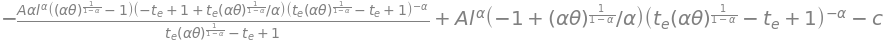

In [21]:
Yp = diff(Y, te)
Yp

The values at zero and one are:

In [22]:
Yl0 = Yp.subs({te:0}).simplify()
Yl1 = Yp.subs({te:1}).simplify()
Yl0, Yl1

So, our "start enclosing" locus and our "finish enclosing" locus are (once again, applicable when the function is concave):

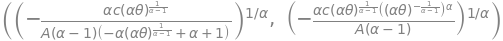

In [23]:
solve(Yl0, l)[0], solve(Yl1, l)[0]

Now, if the circumstances (2) on the list hold, then we just look at endpoints. We form:

In [24]:
dY = Y.subs({te:1}) - Y.subs({te:0})
dY

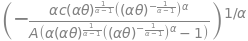

In [25]:
solve(dY, l)[0]

Rewriting these conditions:

$$
l^*_0 = \left[\frac{\alpha c}{A(1-\alpha)((\alpha\theta)^{\frac{1}{1-\alpha}}(1+\alpha)-\alpha)}\right]^\frac{1}{\alpha}
$$

$$
l_1^*
=
\left[
\frac{c}
{A(1-\alpha)\,\theta}
\right]^{\frac{1}{\alpha}}
$$

The flipping point when there is convexity is given by:

$$
l^*=\left[\frac{c}{A(\theta-1)}\right]^\frac{1}{\alpha}
$$

Let's add these lines into the above and see where it gets us. It is a total of three lines...but we will want two diagrams, one with conditional optimality, and one without. So, let's make a switch that does that...

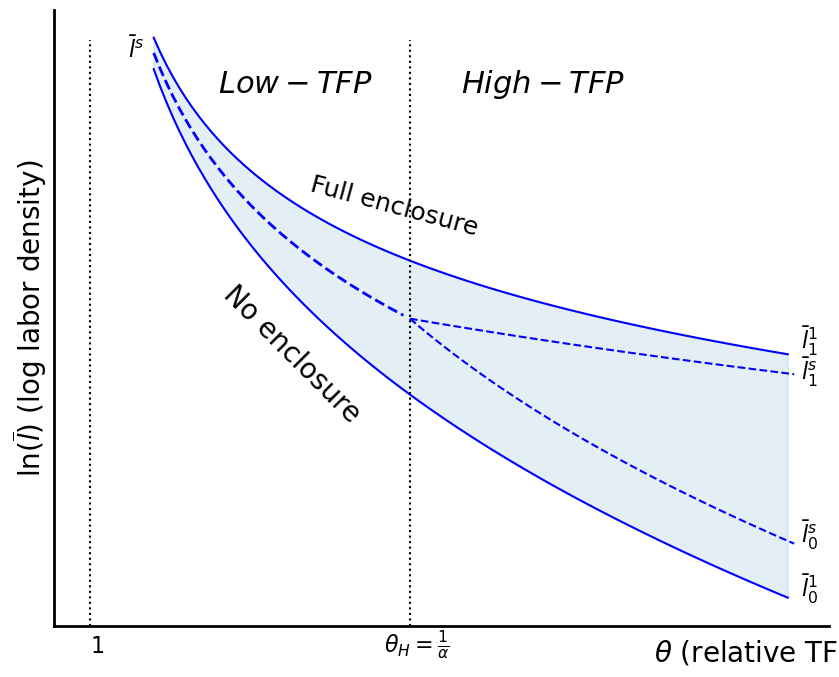

In [26]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.lines import Line2D

##### Base parameters  and switch #####

c        = 1
alp      = 2/3
cond_opt = True

### Throughout it is assumed that A=1 

##### Truncated ranges applicable only at certain points ####

start  = 1.1
finish = 2.1
the_1 = np.arange(start, finish, .01)

ln_l01 = np.log(( c                      / ((the_1**(1/(1-alp)) - 1)*(1-alp))  ) **(1/alp))
ln_l11 = np.log(( c*the_1**(alp/(1-alp)) / ((the_1**(1/(1-alp)) - 1)*(1-alp))  ) **(1/alp))

##### For these lines, we need separate plot ranges, so which run to the critical value

cv = 1 / alp

the_r1 = np.arange(start, cv, .01)
the_r2 = np.arange(cv, finish, .01)

ln_ps0 = np.log(( alp*c                  / (((the_r2*alp)**(1/(1-alp))*(1+alp) - alp)*(1-alp))  ) **(1/alp))
ln_ps1 = np.log(( c                      / (the_r2*(1-alp)  ) ) **(1/alp))
ln_ps  = np.log(( c/(the_r1 - 1))**(1/alp))

#### Added in because of Jonathan's noticing the extension of the global-games line

ln_pse = np.log(( c/(the_r2 -1))**(1/alp))

fig, ax = plt.subplots(figsize=(10, 8))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

xlbl = ax.set_xlabel(r'$\theta$ (relative TFP)', fontsize=20)
ylbl = ax.set_ylabel(r'$\ln(\overline{l})$ (log labor density)', fontsize=20)

# Shift the label on the x-axis a little bit

xpos = list(xlbl.get_position())
xpos[0] = xpos[0]+.41
xpos[1] = xpos[1]-.02
ax.xaxis.set_label_coords(xpos[0], xpos[1])

ax.set_xticks([])
ax.set_yticks([])

oline1 = ax.plot(the_1, ln_l01, color= 'blue')
bline1 = ax.plot(the_1, ln_l11, color= 'blue')

if cond_opt:
    gline1 = ax.plot(the_r2, ln_ps0, color= 'blue', linestyle='dashed')
    pline1 = ax.plot(the_r2, ln_ps1, color= 'blue', linestyle='dashed')
    bkline = ax.plot(the_r1, ln_ps,  color= 'blue', linestyle='dashed', linewidth=2)
#    nkline = ax.plot(the_r2, ln_pse, color= 'blue', linestyle='dotted', linewidth=2)
    

if cond_opt: 
    vline1 = ax.axvline(1/alp, ymax=.95, linestyle=':', color='black')

vline2 = ax.axvline(1, ymax=.95, linestyle=':', color='black')

ep = np.max(the_1)+.021

t1 = ax.text(ep, np.min(ln_l01), r'$\bar l^1_0$', fontsize=16)
t2 = ax.text(ep, np.min(ln_l11)+.05, r'$\bar l^1_1$', fontsize=16)

if cond_opt:
    t3 = ax.text(ep, np.min(ln_ps0), r'$\bar l^s_0$', fontsize=16)
    t4 = ax.text(ep, np.min(ln_ps1)-.05, r'$\bar l^s_1$', fontsize=16)
    t5 = ax.text(the_1[0]-.04,ln_ps[0]-.04, r'$\bar l^s$', fontsize=16)

if cond_opt:
    ax.text(cv-.04, np.min(ln_l01)-.5, r'$\theta_H=\frac{1}{\alpha}$', fontsize=16)
    ax.text(1.2, np.max(ln_l11) - .5, r'$Low-TFP$',fontsize=22)
    ax.text(1.58, np.max(ln_l11) - .5, r'$High-TFP$', fontsize=22)

ax.text(1, np.min(ln_l01)-.5, r'$1$', fontsize=16)


################################ Additional text / labelling of regions ########################

ax.text(1.2, .1, 'No enclosure', rotation=-45, size=20)
ax.text(1.34, 1.8, 'Full enclosure', rotation=-15, size=18)

ax.fill_between(the_1, ln_l01, ln_l11, alpha=.12, color='C0')

if cond_opt == False:
    ax.text(1.3, .9, 'Partial enclosure', rotation=-25, size=18)   

#if cond_opt == True:
#    ax.text(1.74, .2, 'Too much enclosure', rotation=-15, size=11)
#    ax.text(1.74, -.2, 'Too little enclosure', rotation=-19, size=11)
    
if cond_opt == False:
    fig.savefig('social_optimum.png')
else:
    fig.savefig('social_opt_cond.png')

# Decentralized Equilbria

We have found the key loci (as described in the paper) are as follows:

$$
\bar l_0^d = \left[\frac{\alpha c}{(1-\alpha)(\alpha\theta)^{\frac{1}{1-\alpha}}}\right]^\frac{1}{\alpha}
$$

$$
\bar l_1^d = \left[\frac{ c}{\theta(1-\alpha)}\right]^\frac{1}{\alpha}
$$

and

$$
\bar l_{gg}^d = \left[\frac{ \alpha c}{1-\alpha \theta}\frac{1-(\alpha\theta)^{\frac{1}{1-\alpha}}}{(\alpha\theta)^{\frac{1}{1-\alpha}}}\right]^\frac{1}{\alpha}
$$

As we will ultimately superimpose our two diagrams, let's try drawing these in the same scale as the above...

Let's see if we can derive the GG equilibrium. The returns to enclosing a parcel are:

$$
\theta(1-\alpha)\,\bar l^\alpha\,
(\alpha\theta)^{\frac{\alpha}{1-\alpha}}
\Big(1+\big((\alpha\theta)^{\frac{1}{1-\alpha}}-1\big)t_e\Big)^{-\alpha}
- c
$$
We would like to solve for parameters where an agent is indifferent between enclosing or not, which requires:

$$
\int_0^1\left[
\theta(1-\alpha)\bar l^\alpha
(\alpha\theta)^{\frac{\alpha}{1-\alpha}}
\Big(1+\big((\alpha\theta)^{\frac{1}{1-\alpha}}-1\big)t_e\Big)^{-\alpha}
-c
\right]\,dt_e
=0
$$

Integration gives:

$$
\left[
\frac{1}{(\alpha\theta)^{\frac{1}{1-\alpha}}-1}\,
\theta\,\bar l^\alpha\,
(\alpha\theta)^{\frac{\alpha}{1-\alpha}}\,
\Big(1+\big((\alpha\theta)^{\frac{1}{1-\alpha}}-1\big)t_e\Big)^{1-\alpha}
- c\,t_e
\right]_{0}^{1}
=0
$$

Evaluation at the endpoints gives:

$$
\left(
\frac{\theta\,\bar l^\alpha\,(\alpha\theta)^{\frac{\alpha}{1-\alpha}}}{(\alpha\theta)^{\frac{1}{1-\alpha}}-1}
\Big(1+\big((\alpha\theta)^{\frac{1}{1-\alpha}}-1\big)\Big)^{1-\alpha}
- c
\right)
-
\left(
\frac{\theta\,\bar l^\alpha\,(\alpha\theta)^{\frac{\alpha}{1-\alpha}}}{(\alpha\theta)^{\frac{1}{1-\alpha}}-1}
\cdot 1
- 0
\right)
=0
$$

Combining terms gives:

$$
\frac{\theta\,\bar l^\alpha}{(\alpha\theta)^{\frac{1}{1-\alpha}}-1}\,
(\alpha\theta)^{\frac{\alpha}{1-\alpha}}\,
(\alpha\theta-1)
- c
=0
$$

Or:

$$
\frac{\theta\,\bar l^\alpha}{(\alpha\theta)^{\frac{1}{1-\alpha}}-1}
\left(
(\alpha\theta)^{\frac{1}{1-\alpha}}
-
(\alpha\theta)^{\frac{\alpha}{1-\alpha}}
\right)
- c
=0
$$

Solving for $\bar l$ (also called $p$ above...notational change!), and flipping signs in the numerator and denominator, we have:

$$
\bar l
=
\left[
\frac{
c\big(1-(\alpha\theta)^{\frac{1}{1-\alpha}}\big)
}{
\theta\left(
(\alpha\theta)^{\frac{\alpha}{1-\alpha}}
-
(\alpha\theta)^{\frac{1}{1-\alpha}}
\right)
}
\right]^{\frac{1}{\alpha}}
$$

Multiply through by $\alpha / \alpha$

$$
\bar l
=
\left[
\frac{
\alpha c\big(1-(\alpha\theta)^{\frac{1}{1-\alpha}}\big)
}{
\alpha\theta\left(
(\alpha\theta)^{\frac{\alpha}{1-\alpha}}
-
(\alpha\theta)^{\frac{1}{1-\alpha}}
\right)
}
\right]^{\frac{1}{\alpha}}
$$

Multiplying through gives us:

$$
\bar l = \left[\frac{\alpha c(1-(\alpha\theta)^{\frac{1}{1-\alpha}})}{(\alpha\theta)^{\frac{1}{1-\alpha}}-(\alpha\theta)(\alpha\theta)^{\frac{1}{1-\alpha}}}\right]^{\frac{1}{\alpha}}=\left[\frac{\alpha c}{1-\alpha\theta}\frac{1-(\alpha\theta)^{\frac{1}{1-\alpha}}}{(\alpha\theta)^{\frac{1}{1-\alpha}}}\right]^{\frac{1}{\alpha}}
$$

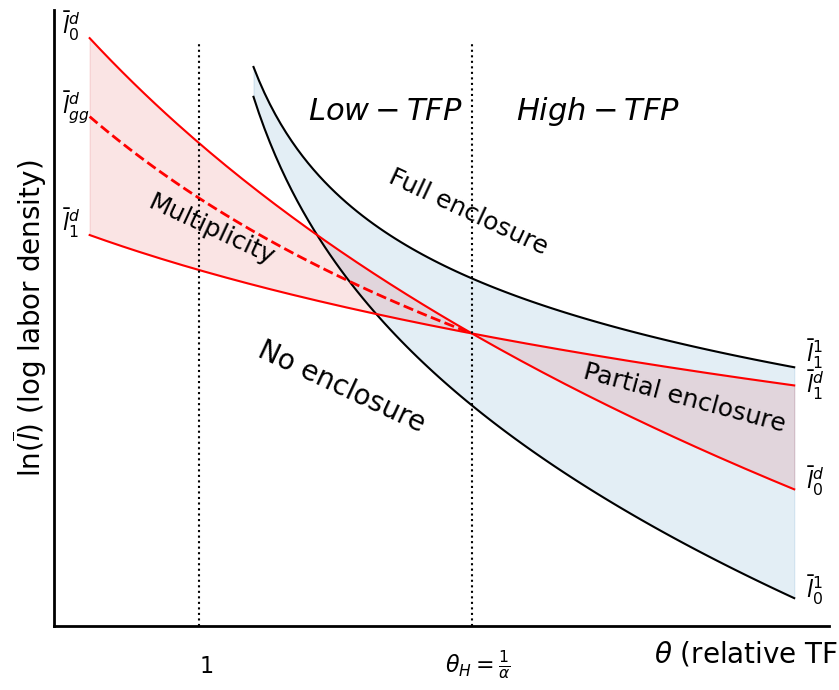

In [27]:
full_diag = True

the_1 = np.arange(start, finish, .01)

### Truncated range for the other stuff

the_d = np.arange(.8, finish, .01)

#the_d = np.arange(1/alp, finish, .01)
the_gg = np.arange(.8, cv, .01 )

ln_l01 = np.log(( c                      / ((the_1**(1/(1-alp)) - 1)*(1-alp))  ) **(1/alp))
ln_l11 = np.log(( c*the_1**(alp/(1-alp)) / ((the_1**(1/(1-alp)) - 1)*(1-alp))  ) **(1/alp))

##### For these lines, we need separate plot ranges, so which run to the critical value

the_r1 = np.arange(start, cv, .01)
the_r2 = np.arange(cv, finish, .01)

### Conditional optimum commented out

ln_ps0 = np.log(( alp*c                  / (((the_r2*alp)**(1/(1-alp))*(1+alp) - alp)*(1-alp))  ) **(1/alp))
ln_ps1 = np.log(( c                      / (the_r2*(1-alp)  ) ) **(1/alp))
ln_ps  = np.log(( c/(the_r1 - 1))**(1/alp))

ln_pse = np.log(( c/(the_r2 -1))**(1/alp))    ### The Jonathan line again!


ln_l0d  = np.log( ( alp*c / ((1-alp)*(alp*the_d)**(1/(1-alp)))  ) **(1/alp) )
ln_l1d  = np.log( ( c / (the_d*(1-alp))) **(1/alp)  )
Lamgg = (alp*the_gg)**(1/(1-alp))
ln_pdgg = np.log( ( alp*c / (1-alp*the_gg) *  (1-Lamgg)/Lamgg )**(1/alp) )               

fig, ax = plt.subplots(figsize=(10, 8))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

xlbl = ax.set_xlabel(r'$\theta$ (relative TFP)', fontsize=20)
ylbl = ax.set_ylabel(r'$\ln(\overline{l})$ (log labor density)', fontsize=20)

# Shift the label on the x-axis a little bit

xpos = list(xlbl.get_position())
xpos[0] = xpos[0]+.41
xpos[1] = xpos[1]-.02
ax.xaxis.set_label_coords(xpos[0], xpos[1])

ax.set_xticks([])
ax.set_yticks([])

ep = np.max(the_1)+.021

# Conditional optimum stuff commented out...

if full_diag:
    oline1 = ax.plot(the_1, ln_l01, color= 'black')
    bline1 = ax.plot(the_1, ln_l11, color= 'black')
    
#    gline1 = ax.plot(the_r2, ln_ps0, color= 'black', linestyle='dashed')
#    pline1 = ax.plot(the_r2, ln_ps1+.02, color= 'black', linestyle='dashed')
#    bkline = ax.plot(the_r1, ln_ps,  color='black', linestyle='dashed')

    t1 = ax.text(ep, np.min(ln_l01), r'$\bar l^1_0$', fontsize=16)
    t2 = ax.text(ep, np.min(ln_l11)+.05, r'$\bar l^1_1$', fontsize=16)
#    t3 = ax.text(ep, np.min(ln_ps0), r'$l^*_0$', fontsize=16)
#    t4 = ax.text(ep, np.min(ln_ps1)-.05, r'$l^*_1$', fontsize=16)
#    t5 = ax.text(cv-.1, np.min(ln_ps)+.34, r'$l^*$', fontsize=16)

## Comment out the global game stuff..

bbline1 = ax.plot(the_d, ln_l0d, color='red')
bbline2 = ax.plot(the_d, ln_l1d, color='red')
bbline3 = ax.plot(the_gg, ln_pdgg, color='red', linestyle='dashed', linewidth=2)

vline1 = ax.axvline(1/alp, ymax=.95, linestyle=':', color='black')
vline2 = ax.axvline(1, ymax=.95, linestyle=':', color='black')

d1  = ax.text(ep, np.min(ln_l0d), r'$\bar l^d_0$', fontsize=16)
dgg = ax.text(the_gg[0]-.05, ln_pdgg[0]+.04, r'$\bar l^d_{gg}$', fontsize=16)

# New left-side labels

dl1 = ax.text(the_gg[0]-.05, ln_l0d[0]+.04, r'$\bar l^d_{0}$', fontsize=16)
dl2 = ax.text(the_gg[0]-.05, ln_l1d[0]+.04, r'$\bar l^d_1$', fontsize=16)

if full_diag:
#    d2  = ax.text(ep+.05, np.min(ln_l1d)-.07, r' $l^d_1$', fontsize=16)
     d2  = ax.text(ep, np.min(ln_l1d)-.07, r'$\bar l^d_1$', fontsize=16)
else:
    d2  = ax.text(ep, np.min(ln_l1d), r'$\bar l^d_1$', fontsize=16)

if full_diag:
    text1 = ax.text(cv-.05, np.min(ln_l0d)-1.75, r'$\theta_H=\frac{1}{\alpha}$', fontsize=16)
    text2 = ax.text(1, np.min(ln_l0d)-1.75, r'$1$', fontsize=16)
else:
    text1 = ax.text(cv-.05, np.min(ln_l0d)-.5, r'$\theta_H=\frac{1}{\alpha}$', fontsize=16)
    text2 = ax.text(1, np.min(ln_l0d)-.5, r'$1$', fontsize=16)    

if full_diag:
    ax.fill_between(the_1, ln_l01, ln_l11, alpha=.12, color='C0')
    
ax.text(1.1, .1, 'No enclosure', rotation=-25, size=20)
ax.text(1.34, 1.8, 'Full enclosure', rotation=-25, size=18)
ax.text(1.7, .1, 'Partial enclosure', rotation=-15, size=18)
ax.text(.9, 1.7, 'Multiplicity', rotation=-25, size=18)
ax.text(1.2, np.max(ln_l11) - .5, r'$Low-TFP$',fontsize=22)
ax.text(1.58, np.max(ln_l11) - .5, r'$High-TFP$', fontsize=22)

ax.fill_between(the_d[the_d>1/alp], ln_l0d[the_d>1/alp], ln_l1d[the_d>1/alp], alpha=.12, color='C3')
ax.fill_between(the_d[the_d<1/alp], ln_l1d[the_d<1/alp], ln_l0d[the_d<1/alp], alpha=.12, color='C3')

#if full_diag:
#    sp_1 = ax.scatter(1.05,2.85)
#    st_1  = ax.text(1.07, 2.87, 'X', fontsize=20)
#    sp_2 = ax.scatter(1.97,-.7)
#    st_2  = ax.text(1.97, -.7, 'Y', fontsize=20)

    
if full_diag:
    fig.savefig('Figures/nash_so_comp.png')
else:
    fig.savefig('Figures/nash_eq.png')

# Monopoly profit function

I will rewrite the whole problem here so that I am sure I didn't clobber stuff previously. So here is the intensive production function.

In [28]:
alpha, p, te, theta, c = symbols('alpha p t_e theta c')

Lam = (alpha*theta)**(1/(1-alpha))

pie = (1-alpha)*p**alpha* Lam/alpha * (1-te+Lam*te)**(-alpha)*te - c*te
pie


The derivative of the above with respect to $t_e$ is:

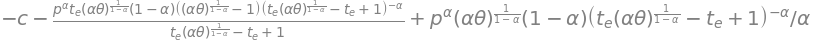

In [29]:
dpiedte = diff(pie, te)
dpiedte

So, now what we can do is basically check the endpoints of this function and see when enclosure should begin. Our first locus, where a monopolist will begin some enclosure...

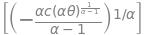

In [30]:
solve(dpiedte.subs({te:0}).simplify(), p)

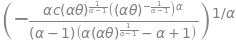

In [31]:
solve(dpiedte.subs({te:1}).simplify(), p)[0]

# Monopoly Diagram

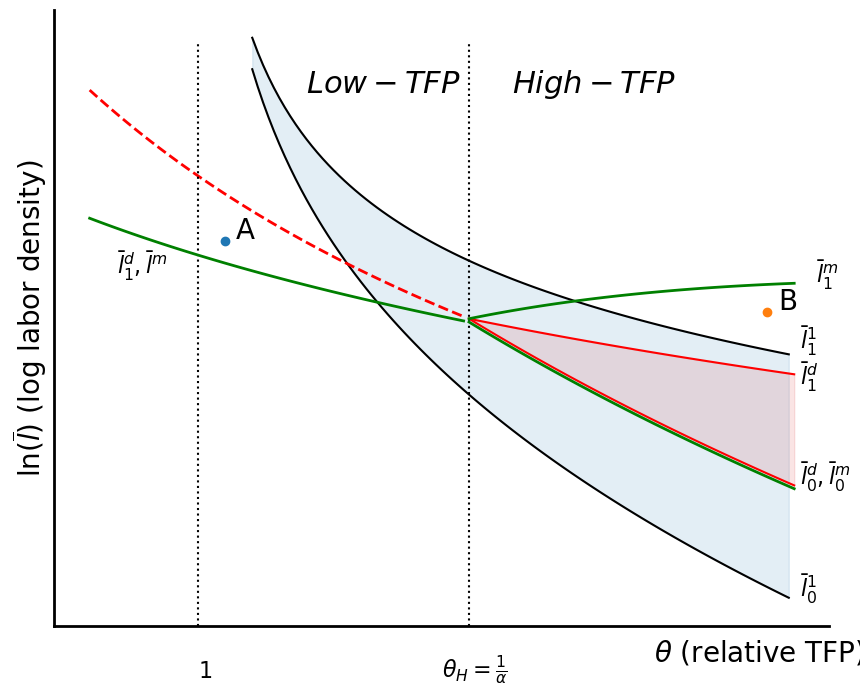

In [32]:
full_diag = True

c        = 1
alp      = 2/3

the_1 = np.arange(start, finish, .01)
#the_d = np.arange(.8, finish, .01)
the_d = np.arange(1/alp, finish, .01)
the_gg = np.arange(.8, cv, .01 )

ln_l01 = np.log(( c                      / ((the_1**(1/(1-alp)) - 1)*(1-alp))  ) **(1/alp))
ln_l11 = np.log(( c*the_1**(alp/(1-alp)) / ((the_1**(1/(1-alp)) - 1)*(1-alp))  ) **(1/alp))

##### For these lines, we need separate plot ranges, so which run to the critical value

the_r1 = np.arange(start, cv, .01)
the_r2 = np.arange(cv, finish, .01)

ln_ps0 = np.log(( alp*c                  / (((the_r2*alp)**(1/(1-alp))*(1+alp) - alp)*(1-alp))  ) **(1/alp))
ln_ps1 = np.log(( c                      / (the_r2*(1-alp)  ) ) **(1/alp))
ln_ps  = np.log(( c/(the_r1 - 1))**(1/alp))

ln_l0d  = np.log( ( alp*c / ((1-alp)*(alp*the_d)**(1/(1-alp)))  ) **(1/alp) )
ln_l1d  = np.log( ( c / (the_d*(1-alp))) **(1/alp)  )
Lamgg = (alp*the_gg)**(1/(1-alp))
ln_pdgg = np.log( ( alp*c / (1-alp*the_gg) *  (1-Lamgg)/Lamgg )**(1/alp) ) 

##### Lines for Monopoly

ln_pm   = np.log( (c / ((1-alp)*the_gg))**(1/alp) ) -.03

Lamr2   = (alp*the_r2)**(1/(1-alp))
ln_pm0  = np.log( (c *alp / ((1-alp)*Lamr2))**(1/alp) ) - .03
ln_pm1  = np.log( (c * alp * Lamr2**alp /((1-alp)*(Lamr2*(1-alp)+alp)) )**(1/alp) )

#### Now for the actual figure 

fig, ax = plt.subplots(figsize=(10, 8))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

xlbl = ax.set_xlabel(r'$\theta$ (relative TFP)', fontsize=20)
ylbl = ax.set_ylabel(r'$\ln(\overline{l})$ (log labor density)', fontsize=20)

# Shift the label on the x-axis a little bit

xpos = list(xlbl.get_position())
xpos[0] = xpos[0]+.41
xpos[1] = xpos[1]-.02
ax.xaxis.set_label_coords(xpos[0], xpos[1])

ax.set_xticks([])
ax.set_yticks([])

ep = np.max(the_1)+.021


if full_diag:
    oline1 = ax.plot(the_1, ln_l01, color= 'black')
    bline1 = ax.plot(the_1, ln_l11, color= 'black')
#    gline1 = ax.plot(the_r2, ln_ps0, color= 'black', linestyle='dashed')
#    pline1 = ax.plot(the_r2, ln_ps1+.02, color= 'black', linestyle='dashed')
#    bkline = ax.plot(the_r1, ln_ps,  color='black', linestyle='dashed')

    t1 = ax.text(ep, np.min(ln_l01), r'$\bar l^1_0$', fontsize=16)
    t2 = ax.text(ep, np.min(ln_l11)+.05, r'$\bar l^1_1$', fontsize=16)
#    t3 = ax.text(ep, np.min(ln_ps0), r'$l^*_0$', fontsize=16)
#    t4 = ax.text(ep, np.min(ln_ps1)-.05, r'$l^*_1$', fontsize=16)
#    t5 = ax.text(cv-.1, np.min(ln_ps)+.34, r'$l^*$', fontsize=16)

bbline1 = ax.plot(the_d, ln_l0d, color='red')
bbline2 = ax.plot(the_d, ln_l1d, color='red')
bbline3 = ax.plot(the_gg, ln_pdgg, color='red', linestyle='dashed', linewidth=2)

vline1 = ax.axvline(1/alp, ymax=.95, linestyle=':', color='black')
vline2 = ax.axvline(1, ymax=.95, linestyle=':', color='black')

moline1 = ax.plot(the_gg, ln_pm, color='green', linewidth=2)
moline2 = ax.plot(the_r2, ln_pm0, color='green', linewidth=2)
moline3 = ax.plot(the_r2, ln_pm1, color='green', linewidth=2)

d1  = ax.text(ep, np.min(ln_l0d), r'$\bar l^d_0, \bar l^m_0$', fontsize=16)
dgg = ax.text(np.max(the_gg)-.64, np.min(ln_pdgg)+.38, r'$\bar l^d_1, \bar l^m$', fontsize=16)

# Adding in a line for global games

#dgg2 = ax.text(the_gg[0]-.06, ln_pdgg[0], r'$l^d_{gg}$', fontsize=16)

if full_diag:
    d2  = ax.text(ep, np.min(ln_l1d)-.1, r'$\bar l^d_1$', fontsize=16)
else:
    d2  = ax.text(ep, np.min(ln_l1d), r'$\bar l^d_1$', fontsize=16)

ax.fill_between(the_1, ln_l01, ln_l11, alpha=.12, color='C0')    
ax.fill_between(the_d[the_d>1/alp], ln_l0d[the_d>1/alp], ln_l1d[the_d>1/alp], alpha=.12, color='C3')

if full_diag:
    text1 = ax.text(cv-.05, np.min(ln_l0d)-1.75, r'$\theta_H=\frac{1}{\alpha}$', fontsize=16)
    text2 = ax.text(1, np.min(ln_l0d)-1.75, r'$1$', fontsize=16)
else:
    text1 = ax.text(cv-.05, np.min(ln_l0d)-.5, r'$\theta_H=\frac{1}{\alpha}$', fontsize=16)
    text2 = ax.text(1, np.min(ln_l0d)-.5, r'$1$', fontsize=16) 
    
if full_diag:
    sp_1 = ax.scatter(1.05,1.75)
    st_1  = ax.text(1.07, 1.77, 'A', fontsize=20)
    sp_2 = ax.scatter(2.05,1.1)
    st_2  = ax.text(2.07, 1.12, 'B', fontsize=20)
    
textm = ax.text(np.max(the_r2)+.04, np.max(ln_pm1), r'$\bar l_1^m$', fontsize=16)
ax.text(1.2, np.max(ln_l11) - .5, r'$Low-TFP$',fontsize=22)
ax.text(1.58, np.max(ln_l11) - .5, r'$High-TFP$', fontsize=22)

if full_diag:
    fig.savefig('Figures/monopoly.png')

# Comparison Figure

Here, we are trying to compare outcomes, the social optimum, and the conditional social optimum.

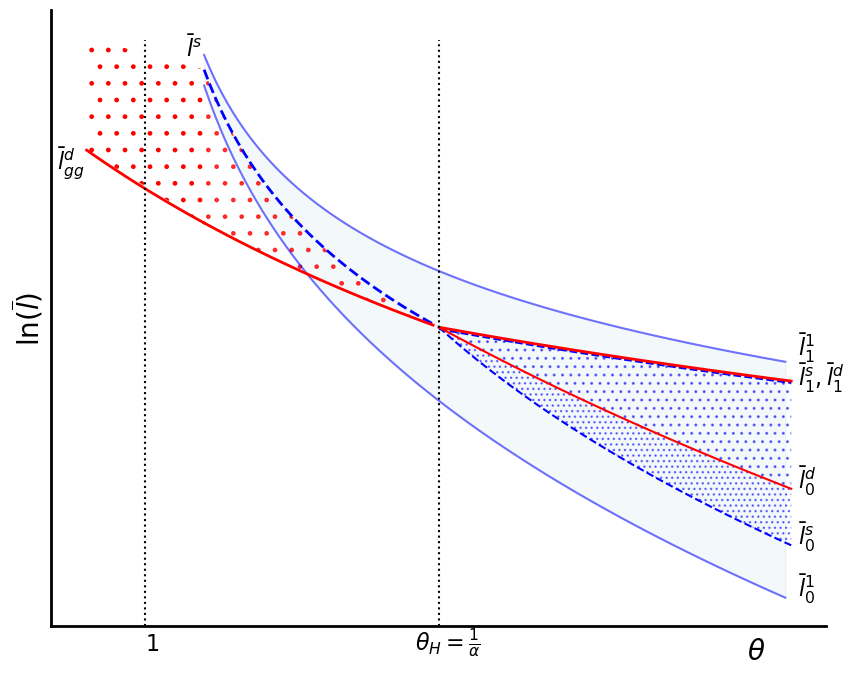

In [33]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.lines import Line2D
from matplotlib.patches import Polygon as MplPolygon

##### Base parameters  and switch #####

c        = 1
alp      = 2/3
cond_opt = True

##### Truncated ranges applicable only at certain points ####

start  = 1.1
finish = 2.1
the_1 = np.arange(start, finish, .01)

ln_l01 = np.log(( c                      / ((the_1**(1/(1-alp)) - 1)*(1-alp))  ) **(1/alp))
ln_l11 = np.log(( c*the_1**(alp/(1-alp)) / ((the_1**(1/(1-alp)) - 1)*(1-alp))  ) **(1/alp))

##### For these lines, we need separate plot ranges, so which run to the critical value

cv = 1 / alp

the_r1 = np.arange(start, cv, .01)
the_r2 = np.arange(cv, finish, .01)

ln_ps0 = np.log(( alp*c                  / (((the_r2*alp)**(1/(1-alp))*(1+alp) - alp)*(1-alp))  ) **(1/alp))
ln_ps1 = np.log(( c                      / (the_r2*(1-alp)  ) ) **(1/alp))
ln_ps  = np.log(( c/(the_r1 - 1))**(1/alp))

#### Added in because of Jonathan's noticing the extension of the global-games line

#ln_pse = np.log(( c/(the_r2 -1))**(1/alp))
ln_l0d  = np.log( ( alp*c / ((1-alp)*(alp*the_r2)**(1/(1-alp)))  ) **(1/alp) )
ln_l1d  = np.log( ( c / (the_r2*(1-alp))) **(1/alp)  )
Lamgg = (alp*the_r1)**(1/(1-alp))
ln_pdgg = np.log( ( alp*c / (1-alp*the_r1) *  (1-Lamgg)/Lamgg )**(1/alp) ) 


#### Let's extend the global games line past what it is above...
exr  = np.arange(.9, start, .01)

Lamgge = (alp*exr)**(1/(1-alp))
ln_pdgge = np.log( ( alp*c / (1-alp*exr) *  (1-Lamgge)/Lamgge )**(1/alp) ) 


fig, ax = plt.subplots(figsize=(10, 8))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

xlbl = ax.set_xlabel(r'$\theta$', fontsize=20)
ylbl = ax.set_ylabel(r'$\ln(\overline{l})$ ', fontsize=20)

# Shift the label on the x-axis a little bit

xpos = list(xlbl.get_position())
xpos[0] = xpos[0]+.41
xpos[1] = xpos[1]-.02
ax.xaxis.set_label_coords(xpos[0], xpos[1])

ax.set_xticks([])
ax.set_yticks([])

oline1 = ax.plot(the_1, ln_l01, color= 'blue', alpha=.54)
bline1 = ax.plot(the_1, ln_l11, color= 'blue', alpha=.54)

if cond_opt:
    gline1 = ax.plot(the_r2, ln_ps0, color= 'blue', linestyle='dashed')
    pline1 = ax.plot(the_r2, ln_ps1-.017, color= 'blue', linestyle='dashed')
    bkline = ax.plot(the_r1, ln_ps,  color= 'blue', linestyle='dashed', linewidth=2)
    bbline1 = ax.plot(the_r2, ln_l0d, color='red')
    bbline2 = ax.plot(the_r2, ln_l1d,  color='red', linewidth=2 )
    bbline3 = ax.plot(the_r1, ln_pdgg, color='red', linewidth=2)
    
    bbline4 = ax.plot(exr, ln_pdgge, color='red', linewidth=2)

if cond_opt: 
    vline1 = ax.axvline(1/alp, ymax=.95, linestyle=':', color='black')

vline2 = ax.axvline(1, ymax=.95, linestyle=':', color='black')

ep = np.max(the_1)+.021

t1 = ax.text(ep, np.min(ln_l01), r'$\bar l^1_0$', fontsize=16)
t2 = ax.text(ep, np.min(ln_l11)+.05, r'$\bar l^1_1$', fontsize=16)


tgg = ax.text(the_r1[0]-.25, ln_pdgg[0]+.5, r'$\bar l^d_{gg}$', fontsize=16)

if cond_opt:
    t3 = ax.text(ep, np.min(ln_ps0), r'$\bar l^s_0$', fontsize=16)
    t4 = ax.text(ep, np.min(ln_ps1)-.05, r'$\bar l^s_1, \bar l^d_1$', fontsize=16)
#    t5 = ax.text(cv-.15, np.min(ln_ps)-.04, r'$l^*$', fontsize=16)
#    t6 = ax.text()
    t7 = ax.text(ep, np.min(ln_l0d), r'$\bar l^d_0$', fontsize=16)

if cond_opt:
    ax.text(cv-.04, np.min(ln_l01)-.5, r'$\theta_H=\frac{1}{\alpha}$', fontsize=16)
#    ax.text(1.2, np.max(ln_l11) - .5, r'$Low-TFP$',fontsize=22)
#    ax.text(1.58, np.max(ln_l11) - .5, r'$High-TFP$', fontsize=22)

one = ax.text(1, np.min(ln_l01)-.5, r'$1$', fontsize=16)

upper_label = ax.text(the_r1[0]-.03,ln_pdgg[0]+1.56, r'$\bar l^s$', fontsize=16)


################################ Additional text / labelling of regions ########################

#ax.text(1.2, .1, 'No enclosure', rotation=-45, size=20)
#ax.text(1.34, 1.8, 'Full enclosure', rotation=-15, size=18)

ax.fill_between(the_1, ln_l01, ln_l11, alpha=.05, color='C0')
ax.fill_between(the_r1, ln_pdgg, ln_ps, alpha=.75, hatch='.', color='none', linewidth=0.0, edgecolor='red'  )

ax.fill_between(the_r2, ln_l0d, ln_ps0, alpha=.5, hatch='...', color='none', linewidth=0.0, edgecolor='blue' )
ax.fill_between(the_r2, ln_l0d, ln_l1d, alpha=.5, hatch='..', color='none', linewidth=0.0, edgecolor='blue')


### Doing hatches out of the standard area 

poly_points = [[exr[0], ln_pdgge[0]],
               [the_r1[0], ln_pdgg[0]],
               [the_r1[0], ln_ps[0]],
               [exr[0], ln_ps[0]+.3]]


triang = ax.add_patch(MplPolygon(poly_points, closed=True, fill=False, linewidth=0))
triang.set_hatch('.')
triang.set_edgecolor('red')

if cond_opt == False:
    ax.text(1.3, .9, 'Partial enclosure', rotation=-25, size=18)   

#if cond_opt == True:
#    ax.text(1.74, .2, 'Too much enclosure', rotation=-15, size=11)
#    ax.text(1.74, -.2, 'Too little enclosure', rotation=-19, size=11)
    
if cond_opt == False:
    fig.savefig('Figures/comparison.png')
else:
    fig.savefig('Figures/comparison.png')

# Part II — The Extended Model (keep $\Lambda$)

In this section, $\Lambda$ is kept as a symbol for readability (In the text, it's called $\Lambda_\mu$. Recall the definition: $\Lambda \equiv (\theta\alpha)^{\frac{1}{1-\alpha}}$.



# Imperfect Village Rights

This is some of the algebra for the $\mu$ case, just so we have a record of what's done. The basic argument is that the village may to some degree codify the usufruct rights inherent in access to the commons. That is, if I have applied my labor to the commons in the past, I apply it to a certain parcel, and thereby get rights over the parcel to some degree. When $\mu$ is unity, my rights over this parcel are completely defined, whereas when $\mu=0$ we are in the traditional commons sector. 

To begin, as before we have our production functions:

$$
T_c^{1-\alpha}L_c^\alpha,\quad \theta T_e^{1-\alpha}L_c^\alpha
$$

We observe the following (due to application of Euler's theorem):

$$
F(T_c,L_c) = T_cF_T(T_c,L_c) + L_cF_L(T_c,L_c)
$$

which then becomes:

$$
\frac{F(T_c,L_c)}{L_c} = \frac{T_c}{L_c}F_T(T_c,L_c) + F_L(T_c,L_c)
$$

This leads us to the equilibrium labor allocation condition:
    
$$
\frac{T_c}{L_c}F_T(T_c,L_c) + F_L(T_c,L_c)=T_L(T_e,L_e)
$$

but what if we "detach" common land from other things? Then, we get:

$$
(1-\mu)\frac{T_c}{L_c}F_T(T_c,L_c) + F_L(T_c,L_c)=T_L(T_e,L_e)
$$

**Perhaps the most interesting thing about this is that the entitlement of village rights means that labor allocation is efficient across uses**

This does a couple of things:

- labor receives lower returns when allocated to the commons
- labor is cheaper for enclosed lands, as the enclosed wage doesn't have to overcome both returns to land and labor. 


## Parametrically speaking

In terms of our parametric model, we have our labor allocation of:

$$
(1-\mu)(1-\alpha)\left(\frac{L_c}{T_c}\right)^\alpha\frac{T_c}{L_c} +\alpha\left(\frac{T_c}{L_c}\right)^{1-\alpha}=\alpha\theta\left(\frac{T_e}{L_e}\right)^{1-\alpha}
$$

Let's rewrite this as:

$$
(1-\mu)(1-\alpha)\left(\frac{L_c}{T_c}\right)^{\alpha-1} +\alpha\left(\frac{L_c}{T_c}\right)^{\alpha-1}=\alpha\theta\left(\frac{L_e}{T_e}\right)^{\alpha-1}
$$

Using our customary notation, we have:

$$
(1-\mu)(1-\alpha)\left(\frac{L}{T}\right)^{\alpha-1}\left(\frac{l_c}{t_c}\right)^{\alpha-1} +\left(\frac{L}{T}\right)^{\alpha-1}\alpha\left(\frac{l_c}{t_c}\right)^{\alpha-1}=\left(\frac{L}{T}\right)^{\alpha-1}\alpha\theta\left(\frac{l_e}{t_e}\right)^{\alpha-1}
$$


If we cancel out the endowments and factor, we get:

$$
(1-\mu)(1-\alpha) \left(\frac{l_c}{t_c}\right)^{\alpha-1} +\alpha\left(\frac{l_c}{t_c}\right)^{\alpha-1}=\alpha\theta\left(\frac{l_e}{t_e}\right)^{\alpha-1}
$$

Which can be written as:

$$
\frac{l_e}{t_e}=\left(\frac{\alpha\theta}{(1-\mu)(1-\alpha) +\alpha}\right)^{\frac{1}{1-\alpha}}\frac{1-l_e}{1-t_e}
$$

Where we can label the thing in the middle $\Lambda_\mu$. THis expression isn't terrible to ponder for a minute - it expresses the relationship between labor intensity on enclosed land versus the commons; it all depends upon whether the thing in the middle is greater than or less than one. 

### Range for $\mu$

So, we see that when $\mu=1$, we have $\Lambda_\mu=\Lambda_o$, while when $\mu=0$, we arrive at $\Lambda$ as before. Thus _$\Lambda_\mu$ is increasing in $\mu$_.

So, we now have:

$$
\frac{l_e}{1-l_e}=\Lambda_\mu\frac{t_e}{1-t_e}
$$

$$
l_e = \frac{\Lambda_\mu t_e}{1+(\Lambda_\mu-1) t_e}, \Lambda_\mu \in [\Lambda,\Lambda_o]
$$

Therefore, given $\mu$ is already greater than one, it will increase the allocation of to enclosures. This is because of the arbitrage condition - as we get closer to equilibration of marginal products across land use, this increases intensity on enclosed land and decrease. But even better, a higher $\mu$ might shift us, given technology and labor density, from the low-TFP to the high-TFP world. 


# Some quick observations

First, we observe that this function is convex to the origin so long as $\Lambda_\mu<1$, and this is really where all the trouble starts in the model.  When this condition holds, labor intensity is lower on enclosed land, and we see that it now depends upon village rights. 
The critical values of $\theta$ for which convexity happens are:

$$
\alpha\theta < (1-\mu)(1-\alpha) + \alpha \quad \rightarrow\quad \theta<1+\frac{(1-\mu)(1-\alpha)}{\alpha}
$$

When $\mu=0$, the right-hand side is equal to $\frac{1}{\alpha}$, while when $\mu=1$, if is just one. So we arrive at the convexity range - the range where interest rates are increasing in enclosure as well - is shrinking as $\mu$ increases. 

We can even get a hint as to why this is the case. When $\mu=1$, labor fulfills no land-rights definition function. This takes a little thought, actually.

## Enclosure rates

The irony is that we now think of the case in which $\mu=1$ as fully internalizing the labor externality. Now, the agent has control over land proportional to labor, and therefore doesn't think about this in the labor allocation decision. 

The rental rate on land now, which becomes:

$$
r(t_e)=(1-\alpha)\theta\left(\frac{L_e}{T_e}\right)^\alpha=(1-\alpha)\theta\left(\bar l\frac{l_e}{t_e}\right)^\alpha
$$

So, we get:

$$
r(t_e) = (1-\alpha)\theta \left(\bar l \frac{\Lambda_\mu }{1-t_e+\Lambda_\mu t_e} \right)^\alpha
$$

## A collection of important Loci

We started out the paper with the loci:

$$
z_o'(0) \leq c \quad \Leftrightarrow \quad    \bar l \le \left[\frac{c}{(1-\alpha)\left(\Lambda_o-1\right)}\right]^{\frac{1}{\alpha}}=l_0^1(\theta)
$$

and continued it with:
$$
z_o'(1)\geq c \quad \Leftrightarrow \quad \bar l \geq \Lambda_o \cdot \left[\frac{c}{(1-\alpha)\left( \Lambda_o-1\right)}\right]^{\frac{1}{\alpha}}=l^o_1(\theta)
$$


# Decentralized Loci

These are a couple of loci that operate when we are discussing decentralized loci. We see that they look as follows:

$$
\bar l \geq \frac{1}{\Lambda_\mu}\left[\frac{c}{\theta}\frac{1}{(1-\alpha)}\right]^{\frac{1}{\alpha}}=l_o^d
$$

Since $\Lambda_\mu$ is increasing in $\mu$, we see that in the convexity region, as $\mu$ increases, the threshold for the onset of enclosure goes down, but this only applies in the convexity region. For full enclosure, we have $t_e=1$, and $\Lambda_\mu$ is not relevant so it all disappears. It is therefore the same as before. 

To be complete, we have, for the case in which $t_e=1$, we have:

$$
\bar l \geq\left[\frac{c}{\theta}\frac{1}{(1-\alpha)}\right]^{\frac{1}{\alpha}}=l_1^d
$$

Thus, the "enclose" range shifts down as $\mu$ increases. It actually shifts down and to the right. 

Thought - redraw the diagram so that we get to unity. Let's try to make a diagram like we had before...


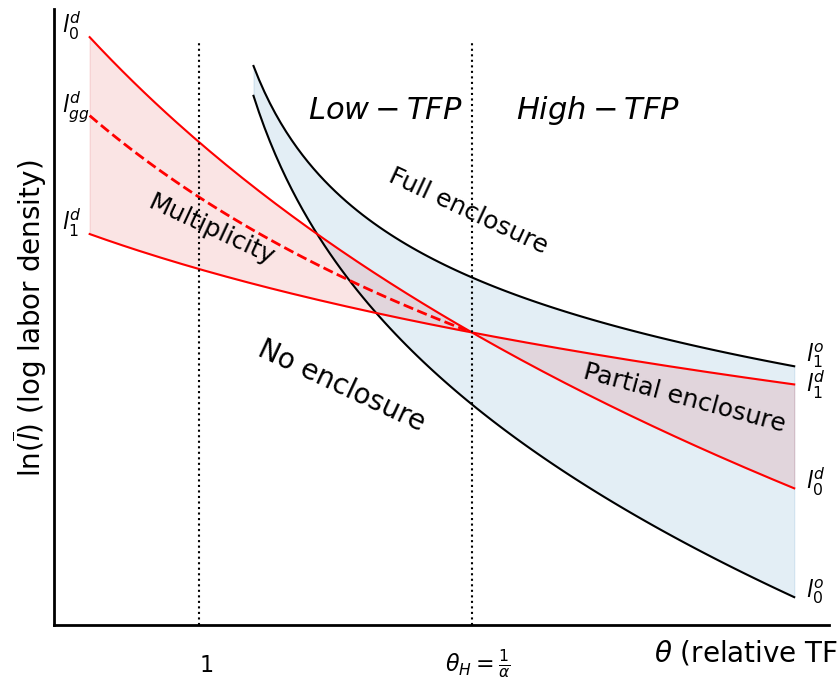

In [34]:
full_diag = True

c        = 1
alp      = 2/3
cond_opt = True

cv = 1 / alp   

##### Truncated ranges applicable only at certain points ####

start  = 1.1
finish = 2.1
the_1 = np.arange(start, finish, .01)

### Truncated range for the other stuff

the_d = np.arange(.8, finish, .01)

the_gg = np.arange(.8, cv, .01 )

ln_l01 = np.log(( c                      / ((the_1**(1/(1-alp)) - 1)*(1-alp))  ) **(1/alp))   # Social optimum lines
ln_l11 = np.log(( c*the_1**(alp/(1-alp)) / ((the_1**(1/(1-alp)) - 1)*(1-alp))  ) **(1/alp))   # As before

##### For these lines, we need separate plot ranges, so which run to the critical value

the_r1 = np.arange(start, cv, .01)
the_r2 = np.arange(cv, finish, .01)


ln_l0d  = np.log( ( alp*c / ((1-alp)*(alp*the_d)**(1/(1-alp)))  ) **(1/alp) )
ln_l1d  = np.log( ( c / (the_d*(1-alp))) **(1/alp)  )
Lamgg = (alp*the_gg)**(1/(1-alp))
ln_pdgg = np.log( ( alp*c / (1-alp*the_gg) *  (1-Lamgg)/Lamgg )**(1/alp) )               

fig, ax = plt.subplots(figsize=(10, 8))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

xlbl = ax.set_xlabel(r'$\theta$ (relative TFP)', fontsize=20)
ylbl = ax.set_ylabel(r'$\ln(\overline{l})$ (log labor density)', fontsize=20)

# Shift the label on the x-axis a little bit

xpos = list(xlbl.get_position())
xpos[0] = xpos[0]+.41
xpos[1] = xpos[1]-.02
ax.xaxis.set_label_coords(xpos[0], xpos[1])

ax.set_xticks([])
ax.set_yticks([])

ep = np.max(the_1)+.021

# Conditional optimum stuff commented out...

if full_diag:
    oline1 = ax.plot(the_1, ln_l01, color= 'black')
    bline1 = ax.plot(the_1, ln_l11, color= 'black')

    t1 = ax.text(ep, np.min(ln_l01), r'$l^o_0$', fontsize=16)
    t2 = ax.text(ep, np.min(ln_l11)+.05, r'$l^o_1$', fontsize=16)

## Comment out the global game stuff..

bbline1 = ax.plot(the_d, ln_l0d, color='red')
bbline2 = ax.plot(the_d, ln_l1d, color='red')
bbline3 = ax.plot(the_gg, ln_pdgg, color='red', linestyle='dashed', linewidth=2)

vline1 = ax.axvline(1/alp, ymax=.95, linestyle=':', color='black')
vline2 = ax.axvline(1, ymax=.95, linestyle=':', color='black')

d1  = ax.text(ep, np.min(ln_l0d), r'$l^d_0$', fontsize=16)
dgg = ax.text(the_gg[0]-.05, ln_pdgg[0]+.04, r'$l^d_{gg}$', fontsize=16)

# New left-side labels

dl1 = ax.text(the_gg[0]-.05, ln_l0d[0]+.04, r'$l^d_{0}$', fontsize=16)
dl2 = ax.text(the_gg[0]-.05, ln_l1d[0]+.04, r'$l^d_1$', fontsize=16)

if full_diag:
     d2  = ax.text(ep, np.min(ln_l1d)-.07, r'$l^d_1$', fontsize=16)
else:
    d2  = ax.text(ep, np.min(ln_l1d), r'$l^d_1$', fontsize=16)

if full_diag:
    text1 = ax.text(cv-.05, np.min(ln_l0d)-1.75, r'$\theta_H=\frac{1}{\alpha}$', fontsize=16)
    text2 = ax.text(1, np.min(ln_l0d)-1.75, r'$1$', fontsize=16)
else:
    text1 = ax.text(cv-.05, np.min(ln_l0d)-.5, r'$\theta_H=\frac{1}{\alpha}$', fontsize=16)
    text2 = ax.text(1, np.min(ln_l0d)-.5, r'$1$', fontsize=16)    

if full_diag:
    ax.fill_between(the_1, ln_l01, ln_l11, alpha=.12, color='C0')
    
ax.text(1.1, .1, 'No enclosure', rotation=-25, size=20)
ax.text(1.34, 1.8, 'Full enclosure', rotation=-25, size=18)
ax.text(1.7, .1, 'Partial enclosure', rotation=-15, size=18)
ax.text(.9, 1.7, 'Multiplicity', rotation=-25, size=18)
ax.text(1.2, np.max(ln_l11) - .5, r'$Low-TFP$',fontsize=22)
ax.text(1.58, np.max(ln_l11) - .5, r'$High-TFP$', fontsize=22)

ax.fill_between(the_d[the_d>1/alp], ln_l0d[the_d>1/alp], ln_l1d[the_d>1/alp], alpha=.12, color='C3')
ax.fill_between(the_d[the_d<1/alp], ln_l1d[the_d<1/alp], ln_l0d[the_d<1/alp], alpha=.12, color='C3')
    
if full_diag:
    fig.savefig('Figures/new_comp_fig.png')

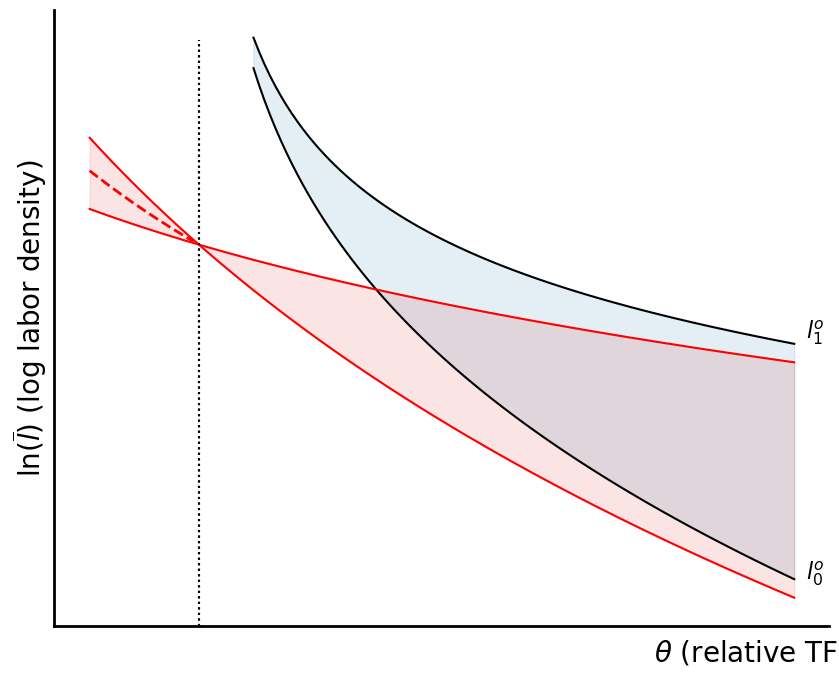

In [35]:
mu = 1

c        = 1           #Cost parameter
alp      = 2/3         #Labor intensity

cond_opt = True

cv = ((1 - mu)*(1-alp) + alp) / alp

##### Truncated ranges applicable only at certain points ####

start  = 1.1
finish = 2.1

the_1 = np.arange(start, finish, .01)
the_d = np.arange(.8, finish, .01)
the_gg = np.arange(.8, cv, .01 )

### Truncated range for the other stuff

# First best loci - same as before.  

ln_l01 = np.log(( c                      / ((the_1**(1/(1-alp)) - 1)*(1-alp))  ) **(1/alp))
ln_l11 = np.log(( c*the_1**(alp/(1-alp)) / ((the_1**(1/(1-alp)) - 1)*(1-alp))  ) **(1/alp))

##### For these lines, we need separate plot ranges, so which run to the critical value

# Decentralized lambdas as a function of mu. 

ln_l0d  = np.log(    1/(alp*the_d/((1-mu)*(1-alp)+alp))**(1/(1-alp))*( c/ the_d * 1/(1-alp)  ) **(1/alp) )
### Same as before 
ln_l1d  = np.log( ( c / (the_d*(1-alp))) **(1/alp)  )

### Global games lines 

Lammu = (alp*the_gg/((1-mu)*(1-alp)+alp))**(1/(1-alp))
ln_pdgg = np.log ( (c/the_gg*(1-Lammu)/(Lammu**alp - Lammu))**(1/alp) )

the_r1 = np.arange(start, cv, .01)
the_r2 = np.arange(cv, finish, .01)

fig, ax = plt.subplots(figsize=(10, 8))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

xlbl = ax.set_xlabel(r'$\theta$ (relative TFP)', fontsize=20)
ylbl = ax.set_ylabel(r'$\ln(\overline{l})$ (log labor density)', fontsize=20)

# Shift the label on the x-axis a little bit

xpos = list(xlbl.get_position())
xpos[0] = xpos[0]+.41
xpos[1] = xpos[1]-.02
ax.xaxis.set_label_coords(xpos[0], xpos[1])

ax.set_xticks([])
ax.set_yticks([])

ep = np.max(the_1)+.021

oline1 = ax.plot(the_1, ln_l01, color= 'black')
bline1 = ax.plot(the_1, ln_l11, color= 'black')

bbline1 = ax.plot(the_d, ln_l0d, color='red')
bbline2 = ax.plot(the_d, ln_l1d, color='red')
bbline3 = ax.plot(the_gg, ln_pdgg, color='red', linestyle='dashed', linewidth=2)

t1 = ax.text(ep, np.min(ln_l01), r'$l^o_0$', fontsize=16)
t2 = ax.text(ep, np.min(ln_l11)+.05, r'$l^o_1$', fontsize=16)

vline1 = ax.axvline(cv, ymax=.95, linestyle=':', color='black')
vline2 = ax.axvline(1, ymax=.95, linestyle=':', color='black')

### Fill for social optimum

ax.fill_between(the_1, ln_l01, ln_l11, alpha=.12, color='C0')

### Fill for second best

ax.fill_between(the_d[the_d>cv], ln_l0d[the_d>cv], ln_l1d[the_d>cv], alpha=.12, color='C3')
ax.fill_between(the_d[the_d<cv], ln_l1d[the_d<cv], ln_l0d[the_d<cv], alpha=.12, color='C3')

Now, what happens if we require compensation in some amount $\nu$ be paid whenever land is enclosed, proportional to the value of land enclosed? Well, in this case, every time a unit of land is enclosed, our guy compares:

$$
r(t_e) \gtrless \nu MP_T^C + c
$$

The parametric form of this equation is as follows:


$$
\bar l ^\alpha (1-\alpha)\theta\left(\frac{l_e}{t_e}\right)^\alpha \gtrless \bar l ^\alpha \nu (1-\alpha)\left(\frac{1-l_e}{1-t_e}\right)^\alpha + c
$$

Generically, for any labor allocation, we now have:

$$
l_e = \frac{\Lambda't_e}{1+t_e(\Lambda'-1)}
$$

So, generically, we have a situation in which the relevant comparison is:

$$
\bar l ^\alpha (1-\alpha)\theta\left(\frac{l_e}{t_e}\right)^\alpha - \bar l ^\alpha \nu (1-\alpha)\left(\frac{1-l_e}{1-t_e}\right)^\alpha = c
$$

This then becomes:

$$
(1-\alpha)\bar l^\alpha \left(\frac{\theta \Lambda'^\alpha-\nu }{(1+t_e(\Lambda'-1))^\alpha}\right) = c
$$

So, if I've done this correctly, we might want to consider this when we have $\Lambda=\left(\alpha\theta\right)^\frac{1}{1-\alpha}$. So, if we invert the above to get the loci, we see that the $t_e=0$ locus is:

$$
l_d^0 = \left[\frac{c}{(1-\alpha)(\theta \Lambda^\alpha - \nu)}\right]^\frac{1}{\alpha}
$$

and we also have:

$$
l_d^1 = \left[\frac{c\Lambda^\alpha}{(1-\alpha)(\theta \Lambda^\alpha - \nu)}\right]^\frac{1}{\alpha}
$$

As a check one can verify that we get our loci back when we use $\nu=0$. But these describe how the loci depend on everything. Finally, look what happens when we use $\Lambda = \theta^\frac{1}{1-\alpha}$. It all works out beautifully...let's see what the diagram looks like when we set $\nu=1$ but otherwise have everything as before. 


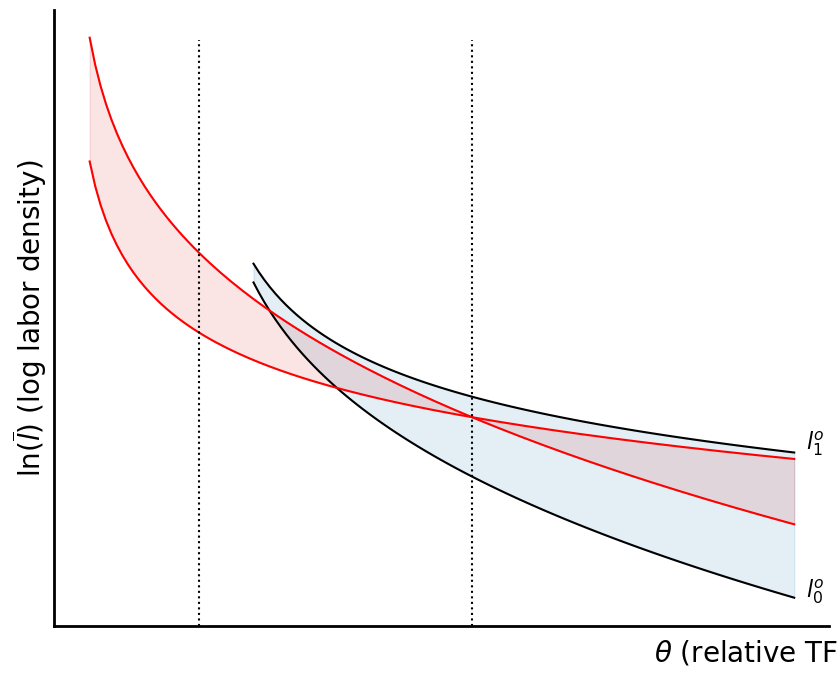

In [36]:
nu = 0.2

c        = 1           #Cost parameter
alp      = 2/3         #Labor intensity

cond_opt = True


cv = 1 / alp   

##### Truncated ranges applicable only at certain points ####

start  = 1.1
finish = 2.1

the_1 = np.arange(start, finish, .01)
the_d = np.arange(.8, finish, .01)
the_gg = np.arange(.8, cv, .01 )

### Truncated range for the other stuff

# First best loci - same as before.  

ln_l01 = np.log(( c                      / ((the_1**(1/(1-alp)) - 1)*(1-alp))  ) **(1/alp))
ln_l11 = np.log(( c*the_1**(alp/(1-alp)) / ((the_1**(1/(1-alp)) - 1)*(1-alp))  ) **(1/alp))

##### For these lines, we need separate plot ranges, so which run to the critical value

# Decentralized lambdas as a function of mu. 

Lammy = (alp*the_d)**(1/(1-alp))
Lammu = (alp*the_gg)**(1/(1-alp))

ln_l0d  = np.log(    ( c/(1-alp) * 1/(the_d*Lammy**alp-nu )    )**(1/alp) )
### Same as before 
ln_l1d  = np.log(    ( c*Lammy**alp/(1-alp) * 1/(the_d*Lammy**alp-nu )    )**(1/alp) )

### Global games lines 

#ln_pdgg = np.log ( (c/the_gg*(1-Lammu)/(Lammu**alp - Lammu))**(1/alp) )

the_r1 = np.arange(start, cv, .01)
the_r2 = np.arange(cv, finish, .01)

fig, ax = plt.subplots(figsize=(10, 8))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

xlbl = ax.set_xlabel(r'$\theta$ (relative TFP)', fontsize=20)
ylbl = ax.set_ylabel(r'$\ln(\overline{l})$ (log labor density)', fontsize=20)

# Shift the label on the x-axis a little bit

xpos = list(xlbl.get_position())
xpos[0] = xpos[0]+.41
xpos[1] = xpos[1]-.02
ax.xaxis.set_label_coords(xpos[0], xpos[1])

ax.set_xticks([])
ax.set_yticks([])

ep = np.max(the_1)+.021

oline1 = ax.plot(the_1, ln_l01, color= 'black')
bline1 = ax.plot(the_1, ln_l11, color= 'black')

bbline1 = ax.plot(the_d, ln_l0d, color='red')
bbline2 = ax.plot(the_d, ln_l1d, color='red')
#bbline3 = ax.plot(the_gg, ln_pdgg, color='red', linestyle='dashed', linewidth=2)

t1 = ax.text(ep, np.min(ln_l01), r'$l^o_0$', fontsize=16)
t2 = ax.text(ep, np.min(ln_l11)+.05, r'$l^o_1$', fontsize=16)

vline1 = ax.axvline(cv, ymax=.95, linestyle=':', color='black')
vline2 = ax.axvline(1, ymax=.95, linestyle=':', color='black')

### Fill for social optimum

ax.fill_between(the_1, ln_l01, ln_l11, alpha=.12, color='C0')

### Fill for second best

ax.fill_between(the_d[the_d>cv], ln_l0d[the_d>cv], ln_l1d[the_d>cv], alpha=.12, color='C3')
ax.fill_between(the_d[the_d<cv], ln_l1d[the_d<cv], ln_l0d[the_d<cv], alpha=.12, color='C3')

# Social Optimum with some commons regulation

Empowering villagers makes enclosure more likely, but not for the usual reasons. It is because of the impact it has on labor allocations. Anyways, let's look at societal returns as a function of $\mu$:

$$
\bar T^{1-\alpha}\bar L^\alpha\left[(1-t_e)^{1-\alpha}(1-l_e)^\alpha+\theta t_e^{1-\alpha}l_e^\alpha\right]-c\bar T t_e
$$


Or in per-unit terms:

$$
\bar l^\alpha \left[(1-t_e)^{1-\alpha}(1-l_e)^\alpha+\theta t_e^{1-\alpha}l_e^\alpha\right]-c t_e
$$

$$
l_e = \frac{\Lambda_\mu t_e}{1-t_e+\Lambda_\mu t_e}, \Lambda_\mu \in [\Lambda,\Lambda_o]
$$

Let's plug in the requisite terms. We see that we get:


$$
\bar l^\alpha \left[(1-t_e)^{1-\alpha}(1- \frac{\Lambda_\mu t_e}{1-t_e+\Lambda_\mu t_e})^\alpha+\theta t_e^{1-\alpha}{\left(\frac{\Lambda_\mu t_e}{1-t_e+\Lambda_\mu t_e}\right)}^\alpha\right]-c t_e
$$


$$
\bar l^\alpha \left[(1-t_e)(1-t_e+\Lambda_\mu t_e)^{-\alpha}+\theta t_e\Lambda^\alpha_\mu(1-t_e+\Lambda_\mu )^{-\alpha}\right]-c t_e
$$

Which in turn can be written as:

$$
\bar l^\alpha \left[\frac{1-t_e+\theta\Lambda_u^\alpha t_e}{(1-t_e+\Lambda_\mu t_e)^{\alpha}}\right]-c t_e
$$

Right off the bat, we can assess whether this function is convex or not based on the numerator and denominator. First of all, let's look at the first derivative. But we see it nests our conditional optimum and our other optimum based on everything. We note that generically, optimal enclosures are given by:

So, we recall that: 

$$
\Lambda_u = \left(\frac{\alpha\theta}{(1-\mu)(1-\alpha) +\alpha}\right)^{\frac{1}{1-\alpha}}
$$

Let's get some general expressions going here to see what we have, and how things work. We get:

First, let's observe the following. The numerator of the expression above is increasing in $t_e$ so long as $\theta\Lambda_\mu^\alpha>1$. Whereas the denominator is increasing in $t_e$ so long as $\Lambda_\mu$ is greater than one. 

We can say that generically, $\theta\Lambda_\mu^\alpha > \Lambda_\mu$, which formally requires:

$$
1\geq\frac{\alpha}{\alpha + (1-\mu)(1-\alpha)}\quad \rightarrow\quad (1-\mu)(1-\alpha)\geq 0
$$. 

Of course, in the case in which $\mu=1$, the two are the same, and we are back in the world of the social optimum, which is more or less obvious. 

Of course now as we move from $\mu=0$ to one we can see how the inner V shape expands to eventually encompass what we really hope happens. 

So, I think we understand what is going on in this case. 

Now, if we want to think about what is going on with the village rights, what to do next? What about some form of compensation for enclosers? 

So, now I'm going to think about how to do this better...and I think we have a good solution to everything. 

Let's observe that the rate of return on private enclosure is:

$$
r_\mu(t_e) = (1-\alpha)\theta\left(\bar l\frac{\Lambda_\mu}{1-t_e+\Lambda_\mu t_e}\right)^\alpha
$$

But if there are some village rights, and enclosers must compensate the village, then for each unit of land enclosed, we have:

$$
r_\mu(t_e) > c + s 
$$

where since compensation must be paid, we have:

$$
r_\mu(t_e) > c + \mu (1-\alpha) \left(\bar l\frac{1}{1-t_e+\Lambda_\mu t_e}\right)^\alpha
$$

So, now the correct term in the global games term becomes:

$$
r_\mu(t_e) - s =  (1-\alpha)\bar l^\alpha \frac{\theta\Lambda_\mu^\alpha-\mu}{(1-t_e+\Lambda_\mu t_e)^\alpha}
$$

This is really all we need to make everything work correctly. Hopefully, that's enough. 

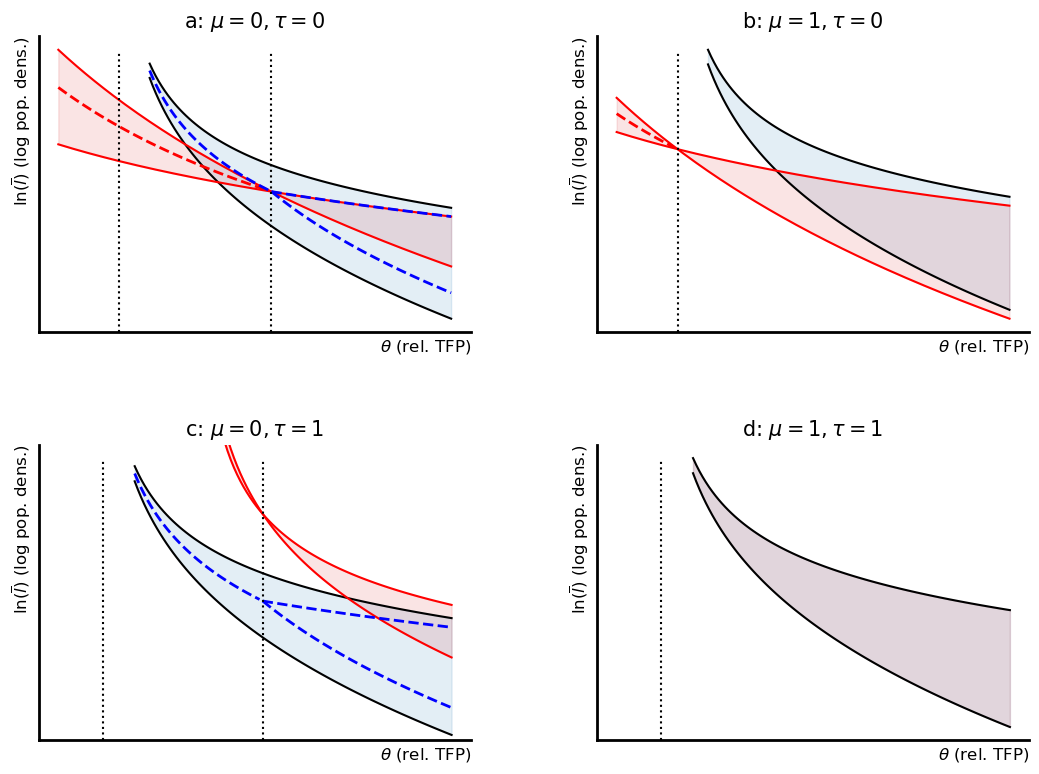

In [37]:
import numpy as np
import matplotlib.pyplot as plt


# -----------------------------
# Parameters
# -----------------------------
c   = 1.0
alp = 2/3

mu = 1.0
nu = 1.0

start  = 1.1
finish = 2.1
step   = 0.01

cv  = 1/alp                              # theta_H = 1/alpha
cv12 = ((1 - mu)*(1-alp) + alp) / alp


# -----------------------------
# Helpers
# -----------------------------
def safe_log_power(expr, power=1.0, shift=0.0):
    """Return log((expr)**power) + shift, masking expr<=0 as NaN."""
    out = np.full_like(expr, np.nan, dtype=float)
    mask = np.isfinite(expr) & (expr > 0)
    out[mask] = np.log(expr[mask]**power) + shift
    return out

def style_axes(ax):
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)

def common_labels(ax):
    ax.set_xlabel(r'$\theta$ (rel. TFP)', loc='right', fontsize=12)
    ax.set_ylabel(r'$\ln(\overline{l})$ (log pop. dens.)', loc='top', fontsize=12)

def fill_between_sorted(ax, x, y1, y2, where_mask, **kwargs):
    m = where_mask & np.isfinite(x) & np.isfinite(y1) & np.isfinite(y2)
    ax.fill_between(x[m], y1[m], y2[m], **kwargs)


# -----------------------------
# Grids
# -----------------------------
the_1    = np.arange(start, finish, step)
the_d    = np.arange(0.8, finish, step)
the_gg   = np.arange(0.8, cv, step)
the_ggmu = np.arange(0.8, cv12, step)


# -----------------------------
# Planner / original (black)
# -----------------------------
den_o  = (the_1**(1/(1-alp)) - 1) * (1-alp)
ln_l01 = safe_log_power(c / den_o, power=1/alp)
ln_l11 = safe_log_power(c * the_1**(alp/(1-alp)) / den_o, power=1/alp)


# -----------------------------
# Decentralized (red)
# -----------------------------
Lamr2  = (alp*the_d)**(1/(1-alp))
ln_l0d = safe_log_power(alp*c / ((1-alp)*Lamr2), power=1/alp)
ln_l1d = safe_log_power(c / (the_d*(1-alp)), power=1/alp)

Lamgg     = (alp*the_gg)**(1/(1-alp))
expr_pdgg = (alp*c / (1 - alp*the_gg)) * ((1 - Lamgg)/Lamgg)
ln_pdgg   = safe_log_power(expr_pdgg, power=1/alp)


# -----------------------------
# mu > 0 only
# -----------------------------
mu_denom   = (1-mu)*(1-alp) + alp
expr_pd0mu = (1 / (alp*the_d/mu_denom)**(1/(1-alp))) * (c/the_d * 1/(1-alp))**(1/alp)
ln_l0dmu   = safe_log_power(expr_pd0mu)
ln_l1dmu   = ln_l1d.copy()

Lammu      = (alp*the_ggmu/mu_denom)**(1/(1-alp))
expr_pdggmu = (c/the_ggmu) * (1 - Lammu) / (Lammu**alp - Lammu)
ln_pdggmu  = safe_log_power(expr_pdggmu, power=1/alp)


# -----------------------------
# nu > 0 only
# -----------------------------
Lammy     = (alp*the_1)**(1/(1-alp))
expr_pd0nu = (c/(1-alp)) * (1/(the_1*Lammy**alp - nu))
expr_pd1nu = (c*Lammy**alp/(1-alp)) * (1/(the_1*Lammy**alp - nu))
ln_l0dnu  = safe_log_power(expr_pd0nu, power=1/alp)
ln_l1dnu  = safe_log_power(expr_pd1nu, power=1/alp)


# -----------------------------
# NEW dashed blue lines: ps (left of theta_H) and ps0/ps1 (right of theta_H)
# -----------------------------
# Use theta-grid the_1 for these lines
the_r1 = the_1
the_r2 = the_1

# Left of theta_H: ln_ps = log((c/(theta-1))^(1/alpha))
inside_ps  = c / (the_r1 - 1)
ln_ps_full = safe_log_power(inside_ps, power=1/alp)
ln_ps      = np.where(the_r1 < cv, ln_ps_full, np.nan)

# Right of theta_H:
# ln_ps0 = log(( alpha*c / ( ((theta*alpha)^(1/(1-alpha))*(1+alpha) - alpha)*(1-alpha) ) )^(1/alpha))
inside_ps0 = (alp*c) / (((the_r2*alp)**(1/(1-alp))*(1+alp) - alp) * (1-alp))
ln_ps0_full = safe_log_power(inside_ps0, power=1/alp)
ln_ps0      = np.where(the_r2 > cv, ln_ps0_full, np.nan)

# ln_ps1 = log(( c / (theta*(1-alpha)) )^(1/alpha))
inside_ps1 = c / (the_r2*(1-alp))
ln_ps1_full = safe_log_power(inside_ps1, power=1/alp)
ln_ps1      = np.where(the_r2 > cv, ln_ps1_full, np.nan)


# -----------------------------
# Plot
# -----------------------------
fig, ax = plt.subplots(2, 2, figsize=(12, 9))
fig.tight_layout(pad=6.0)


# ---- Upper left: mu=0, tau=0
a = ax[0, 0]
a.plot(the_1, ln_l01, color='black')
a.plot(the_1, ln_l11, color='black')
fill_between_sorted(a, the_1, ln_l01, ln_l11, np.ones_like(the_1, bool), alpha=.12, color='C0')

a.plot(the_d, ln_l0d, color='red')
a.plot(the_d, ln_l1d, color='red')
a.plot(the_gg, ln_pdgg, color='red', linestyle='dashed', linewidth=2)

# NEW dashed blue lines
a.plot(the_r1, ln_ps,  linestyle='dashed', color='blue', linewidth=2)
a.plot(the_r2, ln_ps0, linestyle='dashed', color='blue', linewidth=2)
a.plot(the_r2, ln_ps1, linestyle='dashed', color='blue', linewidth=2)

a.axvline(cv, ymax=.95, linestyle=':', color='black')
a.axvline(1,  ymax=.95, linestyle=':', color='black')

fill_between_sorted(a, the_d, ln_l0d, ln_l1d, the_d > cv, alpha=.12, color='C3')
fill_between_sorted(a, the_d, ln_l1d, ln_l0d, the_d < cv, alpha=.12, color='C3')

a.set_title(r'a: $\mu=0,\tau=0$', fontsize=15)
common_labels(a)
style_axes(a)


# ---- Upper right: mu=1, tau=0
b = ax[0, 1]
b.plot(the_1, ln_l01, color='black')
b.plot(the_1, ln_l11, color='black')
fill_between_sorted(b, the_1, ln_l01, ln_l11, np.ones_like(the_1, bool), alpha=.12, color='C0')

b.plot(the_d, ln_l0dmu, color='red')
b.plot(the_d, ln_l1dmu, color='red')
b.plot(the_ggmu, ln_pdggmu, color='red', linestyle='dashed', linewidth=2)

b.axvline(1, ymax=.95, linestyle=':', color='black')

fill_between_sorted(b, the_d, ln_l0dmu, ln_l1dmu, the_d > cv12, alpha=.12, color='C3')
fill_between_sorted(b, the_d, ln_l1dmu, ln_l0dmu, the_d < cv12, alpha=.12, color='C3')

b.set_title(r'b: $\mu=1,\tau=0$', fontsize=15)
common_labels(b)
style_axes(b)


# ---- Lower left: mu=0, tau=1
cax = ax[1, 0]
cax.set_xlim(.8, 2.15)
cax.set_ylim(-1.6, 4)

cax.plot(the_1, ln_l01, color='black')
cax.plot(the_1, ln_l11, color='black')
fill_between_sorted(cax, the_1, ln_l01, ln_l11, np.ones_like(the_1, bool), alpha=.12, color='C0')

cax.plot(the_1, ln_l0dnu, color='red')
cax.plot(the_1, ln_l1dnu, color='red')

# NEW dashed blue lines
cax.plot(the_r1, ln_ps,  linestyle='dashed', color='blue', linewidth=2)
cax.plot(the_r2, ln_ps0, linestyle='dashed', color='blue', linewidth=2)
cax.plot(the_r2, ln_ps1, linestyle='dashed', color='blue', linewidth=2)

cax.axvline(cv, ymax=.95, linestyle=':', color='black')
cax.axvline(1,  ymax=.95, linestyle=':', color='black')

# Keep your original shading rule for this panel (cv12), as before
fill_between_sorted(cax, the_1, ln_l0dnu, ln_l1dnu, the_1 > cv12, alpha=.12, color='C3')
fill_between_sorted(cax, the_1, ln_l1dnu, ln_l0dnu, the_1 < cv12, alpha=.12, color='C3')

cax.set_title(r'c: $\mu=0,\tau=1$', fontsize=15)
common_labels(cax)
style_axes(cax)


# ---- Lower right: mu=1, tau=1
d = ax[1, 1]
d.set_xlim(.8, 2.15)

d.plot(the_1, ln_l01, color='black')
d.plot(the_1, ln_l11, color='black')
fill_between_sorted(d, the_1, ln_l01, ln_l11, np.ones_like(the_1, bool), alpha=.12, color='C0')
fill_between_sorted(d, the_1, ln_l01, ln_l11, np.ones_like(the_1, bool), alpha=.12, color='C3')

d.axvline(1, ymax=.95, linestyle=':', color='black')

d.set_title(r'd: $\mu=1,\tau=1$', fontsize=15)
common_labels(d)
style_axes(d)


# -----------------------------
# Save
# -----------------------------
fig.savefig('Figures/new_comp_fig4x4.png', dpi=200)
plt.show()